In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google_sheet import Sheet

from lol_fandom import SITE
from lol_fandom import get_leagues, get_tournaments
from lol_fandom import get_scoreboard_games, get_scoreboard_players
from lol_fandom import from_response

pd.set_option('display.max_columns', None)
with open('./sheet_id.txt', 'r') as f:
    SHEET_ID = f.read()

In [16]:
sheet = Sheet(SHEET_ID)
sheet.connect_sheet()

In [17]:
leagues = get_leagues(where='L.League_Short="WCS"')
leagues

,League,League Short,Region,Level,IsOfficial
0,World Championship,WCS,International,Primary,Yes


In [18]:
tournaments = get_tournaments('L.League_Short="WCS" and T.Year=2022 and T.Region="International"')
tournaments = tournaments.sort_values(by=['Year', 'DateStart', 'Date']).reset_index(drop=True)
tournaments

,Name,OverviewPage,DateStart,Date,League,Region,EventType,StandardName,Split,SplitNumber,TournamentLevel,IsQualifier,IsPlayoffs,IsOfficial,Year,DateStart__precision,Date__precision
0,Worlds 2022 Play-In,2022 Season World Championship/Play-In,2022-09-29,2022-10-04,World Championship,International,Offline,Worlds 2022 Play-In,None,None,Primary,1,0,1,2022,1,1
1,Worlds 2022 Main Event,2022 Season World Championship/Main Event,2022-10-07,2022-11-05,World Championship,International,Offline,Worlds 2022 Main Event,None,None,Primary,0,0,1,2022,1,1


In [19]:
scoreboard_games = get_scoreboard_games(f'T.OverviewPage="{tournaments["OverviewPage"][1]}"')
scoreboard_games

,OverviewPage,Team1,Team2,WinTeam,LossTeam,DateTime UTC,Team1Score,Team2Score,Winner,Gamelength,Gamelength Number,Team1Bans,Team2Bans,Team1Picks,Team2Picks,Team1Players,Team2Players,Team1Dragons,Team2Dragons,Team1Barons,Team2Barons,Team1Towers,Team2Towers,Team1Gold,Team2Gold,Team1Kills,Team2Kills,Team1RiftHeralds,Team2RiftHeralds,Team1Inhibitors,Team2Inhibitors,Patch,GameId,MatchId,RiotGameId,DateTime UTC__precision
0,2022 Season World Championship/Main Event,100 Thieves,Gen.G,Gen.G,100 Thieves,2022-10-09 22:18:00,0,1,2,29:30,29.500000,"Sejuani,Caitlyn,Yuumi,Lucian,Nilah","Graves,Kalista,Maokai,Varus,Nautilus","Aatrox,Poppy,Taliyah,Miss Fortune,Leona","Camille,Trundle,Azir,Aphelios,Renata Glasc","Ssumday,Closer (Can Çelik),Abbedagge,FBI,huhi","Doran (Choi Hyeon-joon),Peanut,Chovy,Ruler,Leh...",0.0,4.0,0.0,1.0,1.0,9.0,45667.0,56529.0,8.0,17.0,2.0,0.0,0.0,2.0,12.18,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 3_2,None,0
1,2022 Season World Championship/Main Event,100 Thieves,Royal Never Give Up,Royal Never Give Up,100 Thieves,2022-10-11 00:09:00,0,1,2,26:56,26.933333,"Fiora,Lissandra,Galio,Lucian,Varus","Yuumi,Maokai,Azir,LeBlanc,Sylas","Aatrox,Viego,Taliyah,Aphelios,Leona","Jax,Graves,Akali,Kai'Sa,Amumu","Ssumday,Closer (Can Çelik),Abbedagge,FBI,huhi","Breathe,Wei (Yan Yang-Wei),Xiaohu,GALA,Ming (S...",0.0,4.0,0.0,1.0,3.0,8.0,42890.0,54884.0,4.0,17.0,2.0,0.0,0.0,1.0,12.18,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 4_4,None,0
2,2022 Season World Championship/Main Event,Cloud9,Fnatic,Fnatic,Cloud9,2022-10-07 21:16:00,0,1,2,32:24,32.400000,"Graves,Trundle,Caitlyn,Leona,Renekton","Aatrox,Olaf,Yuumi,Sylas,Viktor","Fiora,Sejuani,LeBlanc,Miss Fortune,Nautilus","Ornn,Maokai,Azir,Aphelios,Renata Glasc","Fudge,Blaber,Jensen,Berserker (Kim Min-cheol),...","Wunder,Razork,Humanoid,Upset,Hylissang",1.0,4.0,0.0,1.0,3.0,9.0,52116.0,60456.0,6.0,15.0,2.0,0.0,0.0,1.0,12.18,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 1_1,None,0
3,2022 Season World Championship/Main Event,Cloud9,T1,T1,Cloud9,2022-10-10 00:20:00,0,1,2,25:00,25.000000,"Caitlyn,Fiora,Graves,Thresh,Nautilus","Yuumi,Sejuani,Maokai,Renata Glasc,Tahm Kench","Jax,Poppy,Azir,Tristana,Leona","Aatrox,Viego,Lissandra,Kai'Sa,Alistar","Fudge,Blaber,Jensen,Berserker (Kim Min-cheol),...","Zeus,Oner,Faker,Gumayusi,Keria",0.0,2.0,0.0,1.0,0.0,11.0,36663.0,53769.0,3.0,18.0,0.0,2.0,0.0,3.0,12.18,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 3_4,None,0
4,2022 Season World Championship/Main Event,CTBC Flying Oyster,100 Thieves,CTBC Flying Oyster,100 Thieves,2022-10-07 23:22:00,1,0,1,31:51,31.850000,"Yuumi,Sylas,Seraphine,Leona,Braum","Caitlyn,Maokai,Tristana,Nautilus,Alistar","Aatrox,Viego,Viktor,Kai'Sa,Rell","Fiora,Sejuani,Akali,Miss Fortune,Amumu","Rest,Gemini,Mission,Shunn,Koala (Lin Chih-Chiang)","Ssumday,Closer (Can Çelik),Abbedagge,FBI,huhi",3.0,1.0,1.0,1.0,10.0,2.0,62352.0,52659.0,16.0,9.0,1.0,1.0,1.0,0.0,12.18,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 1_3,None,0
5,2022 Season World Championship/Main Event,DRX,Top Esports,DRX,Top Esports,2022-10-10 02:28:00,1,0,1,30:06,30.100000,"Poppy,Sejuani,Renekton,Viego,Lee Sin","Aatrox,Yuumi,Maokai,Heimerdinger,Ornn","Gnar,Graves,Sylas,Caitlyn,Braum","Jax,Vi,Azir,Draven,Nautilus","Kingen,Pyosik,Zeka (Kim Geon-woo),Deft,BeryL","Wayward,Tian,knight (Zhuo Ding),JackeyLove,Mar...",3.0,1.0,1.0,0.0,10.0,1.0,62099.0,48107.0,15.0,2.0,2.0,0.0,1.0,0.0,12.18,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 3_6,None,0
6,2022 Season World Championship/Main Event,DWG KIA,Evil Geniuses.NA,DWG KIA,Evil Geniuses.NA,2022-10-10 23:13:00,1,0,1,29:29,29.483333,"Akali,Graves,Maokai,Viego,Bel'Veth","Caitlyn,Yuumi,Aatrox,Poppy,Camille","Jayce,Lee Sin,Azir,Aphelios,Renata Glasc","S

In [20]:
scoreboard_players = get_scoreboard_players(f'T.OverviewPage="{tournaments["OverviewPage"][1]}"')
scoreboard_players

,OverviewPage,Name,Link,Champion,Kills,Deaths,Assists,SummonerSpells,Gold,CS,DamageToChampions,VisionScore,Items,Trinket,KeystoneMastery,KeystoneRune,PrimaryTree,SecondaryTree,Runes,TeamKills,TeamGold,Team,TeamVs,Time,PlayerWin,DateTime UTC,DST,Tournament,Role,Role Number,IngameRole,Side,UniqueLine,UniqueLineVs,UniqueRole,UniqueRoleVs,GameId,MatchId,GameTeamId,GameRoleId,GameRoleIdVs,StatsPage,Time__precision,DateTime UTC__precision
0,2022 Season World Championship/Main Event,369,369,Ornn,0,4,7,"Flash,Teleport",11358,255,13221,37,"Control Ward,,Rimeforged Grasp,Mercury's Tread...",Stealth Ward,None,Grasp of the Undying,Resolve,Inspiration,"Grasp of the Undying,Demolish,Bone Plating,Unf...",18,70689,JD Gaming,DWG KIA,None,Yes,2022-10-09 02:28:00,None,None,Top,1,Top,2,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 2_6,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,369/Statistics/2022,None,0
1,2022 Season World Championship/Main Event,369,369,Renekton,4,4,4,"Flash,Teleport",14083,271,11584,42,"Goredrinker,Death's Dance,,Mercury's Treads,St...",Oracle Lens,None,Conqueror,Precision,Resolve,"Conqueror,Triumph,Legend: Alacrity,Last Stand,...",15,64503,JD Gaming,G2 Esports,None,Yes,2022-10-10 21:12:00,None,None,Top,1,Top,1,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 4_1,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,369/Statistics/2022,None,0
2,2022 Season World Championship/Main Event,369,369,Sejuani,4,3,14,"Ignite,Teleport",11831,194,15882,41,"Force of Nature,Ionian Boots of Lucidity,Giant...",Oracle Lens,None,Grasp of the Undying,Resolve,Inspiration,"Grasp of the Undying,Demolish,Second Wind,Over...",24,60517,JD Gaming,Evil Geniuses.NA,None,Yes,2022-10-08 00:33:00,None,None,Top,1,Top,1,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 1_4,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,369/Statistics/2022,None,0
3,2022 Season World Championship/Main Event,Abbedagge,Abbedagge,Akali,3,2,1,"Teleport,Flash",12084,257,9362,29,"Zhonya's Hourglass,Hextech Rocketbelt,Hextech ...",Oracle Lens,None,Conqueror,Precision,Resolve,"Conqueror,Presence of Mind,Legend: Tenacity,Co...",9,52659,100 Thieves,CTBC Flying Oyster,None,No,2022-10-07 23:22:00,None,None,Mid,3,Mid,2,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event_Day ...,2022 Season World Championship/Main Event_Day 1_3,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,2022 Season World Championship/Main Event/Scor...,Abbedagge/Statistics/2022,None,0
4,2022 Season World Championship/Main Event,Abbedagge,Abbedagge,Taliyah,0,5,6,"Ghost,Flash",9285,222,10895,25,"Liandry's Anguish,Void Staff,,,Tear of the God...",Farsight Alteration,None,Unsealed Spellbook,Inspiration,Resolve,"Unsealed Spellbook,Perfect Timing,Minion Demat.

In [21]:
scoreboard_games.shape[0] * 10 == scoreboard_players.shape[0]

True

In [22]:
def champions_stats(games, players):
    merged = pd.merge(players, games, how='left', on='GameId')
    grouped = merged.groupby('Champion')

    champions = pd.DataFrame()
    champions[[
        'Kills', 'Deaths', 'Assists', 'Gold',
        'CS', 'DamageToChampions', 'VisionScore']
    ] = grouped[[
        'Kills', 'Deaths', 'Assists', 'Gold',
        'CS', 'DamageToChampions', 'VisionScore'
    ]].mean()
    champions['GamesPlayed'] = grouped['Name'].count()
    champions['By'] = grouped['Name'].nunique()
    champions[['Win', 'Loss']] = grouped['PlayerWin'].value_counts().unstack(fill_value=0).rename(columns={'Yes': 'Win', 'No': 'Loss'})
    champions['WinRate'] = champions['Win'] / champions['GamesPlayed']
    champions['KDA'] = champions[['Kills', 'Assists']].sum(axis=1) / champions['Deaths']
    champions['CS_M'] = champions['CS'] / grouped['Gamelength Number'].mean()
    champions['GoldM'] = champions['Gold'] / grouped['Gamelength Number'].mean()
    champions['KillParticipation'] = champions[['Kills', 'Assists']].sum(axis=1) / grouped['TeamKills'].mean()
    champions['KillShare'] = champions['Kills'] / grouped['TeamKills'].mean()
    champions['GoldShare'] = champions['Gold'] / grouped['TeamGold'].mean()
    champions['As'] = grouped['IngameRole'].unique()

    ban_list = games[['Team1Bans', 'Team2Bans']].unstack().str.split(',')
    banned = {}
    for bans in ban_list:
        for b in bans:
            if b not in banned:
                banned[b] = 0
            banned[b] += 1
    for champ, ban in banned.items():
        champions.loc[champ, 'Banned'] = ban

    champions['Games'] = champions[['GamesPlayed', 'Banned']].sum(axis=1)
    champions['PickBanRate'] = champions['Games'] / games.shape[0]
    
    int_types = ['GamesPlayed', 'Win', 'Loss', 'Banned', 'Games']
    champions.loc[:, int_types] = champions.loc[:, int_types].fillna(0)
    champions[int_types] = champions[int_types].astype('int')

    columns = [
        'Games', 'PickBanRate', 'Banned', 'GamesPlayed', 'By', 'Win', 'Loss',
        'WinRate', 'Kills', 'Deaths', 'Assists', 'KDA', 'DamageToChampions',
        'CS', 'CS_M', 'Gold', 'GoldM', 'VisionScore',
        'KillParticipation', 'KillShare', 'GoldShare', 'As'
    ]
    champions = champions[columns]
    
    return champions


champions = champions_stats(scoreboard_games, scoreboard_players)
champions['As'] = champions['As'].str.join(', ')
sheet.update_sheet('champions', champions)

C:\Users\posky\AppData\Roaming\Python\Python310\site-packages\httplib2\__init__.py:147: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = ssl.SSLContext(DEFAULT_TLS_VERSION)


In [23]:
def players_stats(games, _players):
    merged = pd.merge(_players, games, how='left', on='GameId')
    grouped = merged.groupby('Name')

    players = pd.DataFrame(index=_players['Name'].unique())
    players['Team'] = grouped.tail(1).set_index('Name')['Team']
    players['Games'] = grouped['Champion'].count()
    players[['Win', 'Loss']] = grouped['PlayerWin'].value_counts().unstack(
        fill_value=0).rename(columns={'Yes': 'Win', 'No': 'Loss'})[['Win', 'Loss']]
    players['WinRate'] = players['Win'] / players['Games']
    players[['Kills', 'Deaths', 'Assists', 'CS', 'Gold']] = grouped[['Kills', 'Deaths', 'Assists', 'CS', 'Gold']].mean()
    players['KDA'] = players[['Kills', 'Assists']].sum(axis=1) / players['Deaths']
    players['CS_M'] = players['CS'] / grouped['Gamelength Number'].mean()
    players['GoldM'] = players['Gold'] / grouped['Gamelength Number'].mean()
    players['KillParticipation'] = players[['Kills', 'Assists']].sum(axis=1) / grouped['TeamKills'].mean()
    players['KillShare'] = players['Kills'] / grouped['TeamKills'].mean()
    players['GoldShare'] = players['Gold'] / grouped['TeamGold'].mean()
    players['DPM'] = grouped['DamageToChampions'].sum() / grouped['Gamelength Number'].sum()
    players['VisionScoreM'] = grouped['VisionScore'].sum() / grouped['Gamelength Number'].sum()
    players['ChampionsPlayed'] = grouped['Champion'].nunique()
    champs = grouped['Champion'].value_counts(sort=True, ascending=False)
    keys = players.index
    values = []
    for key in keys:
        values.append(list(champs[key].index))
    players['Champs'] = pd.Series(data=values, index=keys)

    columns = [
        'Team', 'Games', 'Win', 'Loss', 'WinRate', 'Kills', 'Deaths', 'Assists',
        'KDA', 'DPM', 'CS', 'CS_M', 'Gold', 'GoldM', 'VisionScoreM',
        'KillParticipation', 'KillShare', 'GoldShare', 'ChampionsPlayed', 'Champs'
    ]
    players = players[columns]
    players.index.name = 'Player'

    return players


players = players_stats(scoreboard_games, scoreboard_players)
players['Champs'] = players['Champs'].str.join(', ')
sheet.update_sheet('players', players)

In [24]:
def champions_comp_stats(games, players, _comps=['Top', 'Jungle', 'Mid', 'Bot', 'Support']):
    assert isinstance(_comps, list)
    positions = ['Top', 'Jungle', 'Mid', 'Bot', 'Support']
    for pos in _comps:
        assert pos in positions

    merged = pd.merge(players, games, how='left', on='GameId')
    grouped = merged.groupby(['GameId', 'Team'])
    data = {}
    for df in grouped:
        df = df[1]
        idx = []
        by = []
        for pos in _comps:
            idx.append(df.loc[df['IngameRole'] == pos, 'Champion'].iloc[0])
            by.append(df.loc[df['IngameRole'] == pos, 'Name'].iloc[0])
        idx = tuple(idx)
        by = tuple(by)
        if idx not in data:
            data[idx] = {
                'Win': 0,
                'Loss': 0,
                'By': []
            }
        result = 'Win' if df.iloc[0]['PlayerWin'] == 'Yes' else 'Loss'
        data[idx][result] += 1
        data[idx]['By'].append(by)
    for idx in data.keys():
        data[idx]['By'] = len(set(data[idx]['By']))
    comps = pd.DataFrame(data=data.values(), index=data.keys())
    comps['Games'] = comps[['Win', 'Loss']].sum(axis=1)
    comps['WinRate'] = comps['Win'] / comps['Games']

    comps = comps[['Games', 'By', 'Win', 'Loss', 'WinRate']]
    comps.index = comps.index.set_names(_comps)
    
    return comps

positions = ['Bot', 'Support']
comps = champions_comp_stats(scoreboard_games, scoreboard_players, positions)
comps = comps.sort_values(by='Games', ascending=False)
sheet.update_sheet('Bot_Support_stats', comps)

In [25]:
def champions_vs_stats(games, players, champs=None):
    merged = pd.merge(players, games, how='left', on='GameId')
    grouped = merged.groupby(['GameId', 'IngameRole'])

    data = {}
    for df in grouped:
        df = df[1]
        champions = [df.iloc[0], df.iloc[1]]
        idx = [
            (champions[0]['Champion'], champions[1]['Champion']),
            (champions[1]['Champion'], champions[0]['Champion'])
        ]
        for i in idx:
            if i not in data:
                data[i] = {
                    'Win': 0,
                    'Loss': 0,
                    'As': []
                }
        for i, champ in zip(idx, champions):
            result = 'Win' if champ['PlayerWin'] == 'Yes' else 'Loss'
            data[i][result] += 1
            data[i]['As'].append(champ['IngameRole'])
    for key in data.keys():
        data[key]['As'] = list(set(data[key]['As']))
    vs_stats = pd.DataFrame(data=data.values(), index=data.keys())
    vs_stats['Games'] = vs_stats[['Win', 'Loss']].sum(axis=1)
    vs_stats['WinRate'] = vs_stats['Win'] / vs_stats['Games']
    vs_stats = vs_stats[['Games', 'Win', 'Loss', 'WinRate', 'As']]

    if champs is not None:
        champions = []
        for champ in champs:
            if champ in merged['Champion']:
                champions.append(champ)

    vs_stats.index = vs_stats.index.set_names(['Champion1', 'Champion2'])
    
    return vs_stats if champs is None else vs_stats[champions]


vs_stats = champions_vs_stats(scoreboard_games, scoreboard_players)
vs_stats = vs_stats.sort_values(by='Games', ascending=False)
vs_stats['As'] = vs_stats['As'].str.join(', ')
sheet.update_sheet('vs_stats', vs_stats)

In [26]:
def player_by_champions(games, players, champs=None):
    merged = pd.merge(players, games, how='left', on='GameId')
    grouped = merged.groupby(['Name', 'Champion'])

    players_by = pd.DataFrame()
    players_by['Team'] = grouped.tail(1).set_index(['Name', 'Champion'])['Team']
    players_by['Games'] = grouped['Team'].count()
    players_by[['Win', 'Loss']] = grouped['PlayerWin'].value_counts().unstack(
        fill_value=0).rename(columns={'Yes': 'Win', 'No': 'Loss'})[['Win', 'Loss']]
    players_by['WinRate'] = players_by['Win'] / players_by['Games']
    players_by[['Kills', 'Deaths', 'Assists', 'CS', 'Gold']] = grouped[
        ['Kills', 'Deaths', 'Assists', 'CS', 'Gold']].mean()
    players_by['KDA'] = players_by[['Kills', 'Assists']].sum(axis=1) / players_by['Deaths']
    players_by['CS_M'] = players_by['CS'] / grouped['Gamelength Number'].mean()
    players_by['GoldM'] = players_by['Gold'] / grouped['Gamelength Number'].mean()
    players_by['KillParticipation'] = players_by[['Kills', 'Assists']].sum(axis=1) / grouped['TeamKills'].mean()
    players_by['KillShare'] = players_by['Kills'] / grouped['TeamKills'].mean()
    players_by['GoldShare'] = players_by['Gold'] / grouped['TeamGold'].mean()
    players_by['DPM'] = grouped['DamageToChampions'].sum() / grouped['Gamelength Number'].sum()
    players_by['VisionScoreM'] = grouped['VisionScore'].sum() / grouped['Gamelength Number'].sum()

    columns = [
        'Team', 'Games', 'Win', 'Loss', 'WinRate', 'Kills', 'Deaths', 'Assists',
        'KDA', 'DPM', 'CS', 'CS_M', 'Gold', 'GoldM', 'VisionScoreM',
        'KillParticipation', 'KillShare', 'GoldShare'
    ]
    players_by = players_by[columns]

    return players_by

players_by = player_by_champions(scoreboard_games, scoreboard_players)
sheet.update_sheet('players_by_champions', players_by)

In [27]:
def teams_stats(games, players):
    games['Team1Win'] = games['Winner'].transform(lambda x: x == 1)
    games['Team2Win'] = games['Winner'].transform(lambda x: x == 2)
    games['GPM1'] = games['Team1Gold'] / games['Gamelength Number']
    games['GPM2'] = games['Team2Gold'] / games['Gamelength Number']
    games['KPM1'] = games['Team1Kills'] / games['Gamelength Number']
    games['KPM2'] = games['Team2Kills'] / games['Gamelength Number']
    games['GDPM1'] = (games['Team1Gold'] - games['Team2Gold']) / games['Gamelength Number']
    games['GDPM2'] = (games['Team2Gold'] - games['Team1Gold']) / games['Gamelength Number']
    grouped1 = games.groupby('Team1')
    grouped2 = games.groupby('Team2')

    teams = pd.DataFrame(index=pd.concat([games['Team1'], games['Team2']]).unique())
    teams.index = teams.index.set_names('Team')

    teams['Games'] = grouped1['Winner'].count() + grouped2['Winner'].count()
    teams['Win'] = grouped1['Team1Win'].sum() + grouped2['Team2Win'].sum()
    teams['Loss'] = grouped1['Team2Win'].sum() + grouped2['Team1Win'].sum()
    teams['WinRate'] = teams['Win'] / teams['Games']
    teams['GameDuration'] = (grouped1['Gamelength Number'].sum() + 
        grouped2['Gamelength Number'].sum()) / teams['Games']
    teams['GPM'] = (grouped1['GPM1'].sum() + grouped2['GPM2'].sum()) / teams['Games']
    teams['GDPM'] = (grouped1['GDPM1'].sum() + grouped2['GDPM2'].sum()) / teams['Games']
    teams['KPM'] = (grouped1['KPM1'].sum() + grouped2['KPM2'].sum()) / teams['Games']
    teams['Out'] = teams['KPM'] * teams['GDPM']

    return teams

teams = teams_stats(scoreboard_games, scoreboard_players)
sheet.update_sheet('teams', teams)

C:\Users\posky\AppData\Local\Temp\ipykernel_23000\3778009901.py:6: RuntimeWarning: divide by zero encountered in divide
  x = 100 / y


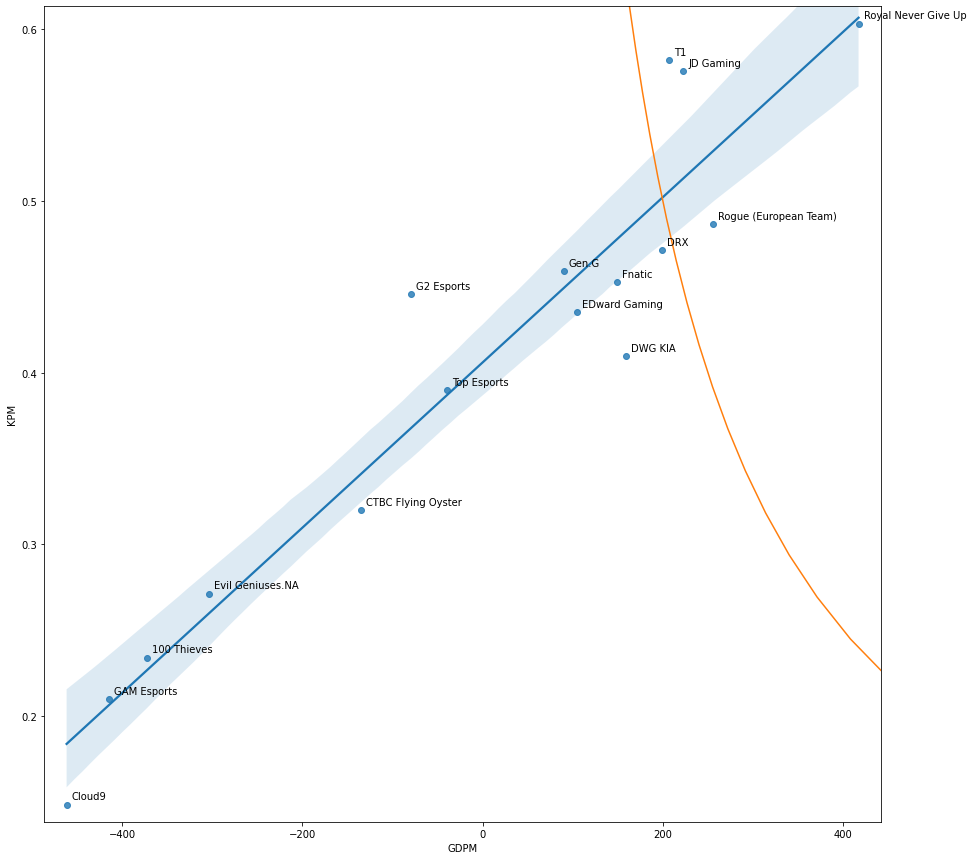

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_xlim(teams['GDPM'].min() - 25, teams['GDPM'].max() + 25)
ax.set_ylim(teams['KPM'].min() - 0.01, teams['KPM'].max() + 0.01)
ax = sns.regplot(data=teams, x='GDPM', y='KPM')
y = np.linspace(0, 1.2)
x = 100 / y
sns.lineplot(x=x, y=y)
for index, i in zip(teams.index, range(teams.shape[0])):
    row = teams.iloc[i]
    plt.annotate(index, xy=(row['GDPM'], row['KPM']), xytext=(5, 5), textcoords='offset pixels')

In [36]:
def players_champions_comp_stats(games, players, _comps=['Top', 'Jungle', 'Mid', 'Bot', 'Support']):
    assert isinstance(_comps, list)
    positions = ['Top', 'Jungle', 'Mid', 'Bot', 'Support']
    for pos in _comps:
        assert pos in positions

    merged = pd.merge(players, games, how='left', on='GameId')
    grouped = merged.groupby(['GameId', 'Team'])
    data = {}
    for df in grouped:
        df = df[1]
        player_idx = []
        champion_idx = []        
        for pos in _comps:
            player_idx.append(df.loc[df['IngameRole'] == pos, 'Name'].iloc[0])
            champion_idx.append(df.loc[df['IngameRole'] == pos, 'Champion'].iloc[0])
        idx = tuple([df['Team'].iloc[0]] + player_idx + champion_idx)
        if idx not in data:
            data[idx] = {
                'Win': 0,
                'Loss': 0
            }
        result = 'Win' if df.iloc[0]['PlayerWin'] == 'Yes' else 'Loss'
        data[idx][result] += 1
    comps = pd.DataFrame(data=data.values(), index=data.keys())
    comps['Games'] = comps[['Win', 'Loss']].sum(axis=1)
    comps['WinRate'] = comps['Win'] / comps['Games']

    comps = comps[['Games', 'Win', 'Loss', 'WinRate']]
    comps.index = comps.index.set_names(
        ['Team'] + \
        list(map(lambda x: x + 'Player', _comps)) + \
        _comps
    )

    return comps

positions = ['Bot', 'Support']
player_comps = players_champions_comp_stats(scoreboard_games, scoreboard_players, positions)
player_comps = player_comps.sort_values(by=['Games', 'WinRate'], ascending=False)
sheet.update_sheet('Bot_Support_Player_stats', player_comps)